## CIENCCIA DE DATOS EN PYTHON
### PROYECTO FINAL

### Estimacion de Modelo

Crear modelos predictivos de regresion lineal uni-variable sencillos

#### Paso No.1

In [81]:
###### Librerias

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Carga de data

In [3]:
import numpy as np
data_proy = np.load('proyecto_training_data.npy')

In [4]:
dimension = data_proy.shape
dimension

(1460, 6)

In [5]:
rango = data_proy.ndim
rango

2

In [6]:
# Revision de la Data

In [7]:
# Nombrar las Variables
data = pd.DataFrame(data=data_proy, columns=['V1', 'V2', 'V3', 'V4', 'year', 'V5'])

In [8]:
# Reordenar variables, anio primera variable
data = data[['year','V1','V2','V3','V4','V5']]

In [9]:
# Revisiones valores NaN
data.isnull().any()

year    False
V1      False
V2      False
V3      False
V4      False
V5       True
dtype: bool

In [10]:
# Eliminar Valores NaN
data = data.fillna(method='ffill')
data

,year,V1,V2,V3,V4,V5
0,2003.0,208500.0,7.0,856.0,8.0,65.0
1,1976.0,181500.0,6.0,1262.0,6.0,80.0
2,2001.0,223500.0,7.0,920.0,6.0,68.0
3,1915.0,140000.0,7.0,961.0,7.0,60.0
4,2000.0,250000.0,8.0,1145.0,9.0,84.0
...,...,...,...,...,...,...
1455,1999.0,175000.0,6.0,953.0,7.0,62.0
1456,1978.0,210000.0,6.0,2073.0,7.0,85.0
1457,1941.0,266500.0,7.0,1188.0,9.0,66.0
1458,1950.0,142125.0,5.0,1078.0,5.0,68.0


In [11]:
data.isnull().any()

year    False
V1      False
V2      False
V3      False
V4      False
V5      False
dtype: bool

#### Paso No.2

#### Separacion de la data

In [12]:
#Entrenamiento-Validacion y Prueba

In [89]:
x = data['V1']
y = data['V2']
#y = data.iloc[:, 1:6]

In [90]:
x

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: V1, Length: 1460, dtype: float64

In [91]:
y

0       7.0
1       6.0
2       7.0
3       7.0
4       8.0
       ... 
1455    6.0
1456    6.0
1457    7.0
1458    5.0
1459    5.0
Name: V2, Length: 1460, dtype: float64

In [92]:
train_x = x[:80]
train_y = y[:80]

In [93]:
test_x = x[80:]
test_y = y[80:]

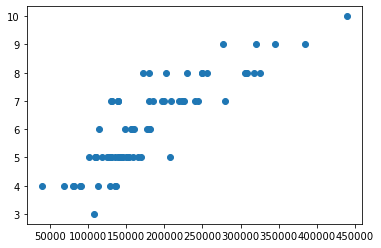

In [94]:
plt.scatter(train_x, train_y)
plt.show()

In [37]:
df2 = data.iloc[:, 1:6]
df2

,V1,V2,V3,V4,V5
0,208500.0,7.0,856.0,8.0,65.0
1,181500.0,6.0,1262.0,6.0,80.0
2,223500.0,7.0,920.0,6.0,68.0
3,140000.0,7.0,961.0,7.0,60.0
4,250000.0,8.0,1145.0,9.0,84.0
...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,62.0
1456,210000.0,6.0,2073.0,7.0,85.0
1457,266500.0,7.0,1188.0,9.0,66.0
1458,142125.0,5.0,1078.0,5.0,68.0


#### Paso No.3

#### Analisis Exploratorio de los datos

In [38]:
#Informacion de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1460 non-null   float64
 1   V1      1460 non-null   float64
 2   V2      1460 non-null   float64
 3   V3      1460 non-null   float64
 4   V4      1460 non-null   float64
 5   V5      1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [39]:
# Informacion estadistica de la data
df2.describe()

,V1,V2,V3,V4,V5
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1162.626712,6.517808,70.104795
std,79442.502883,1.382997,386.587738,1.625393,23.846996
min,34900.000000,1.000000,334.000000,2.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,70.000000
75%,214000.000000,7.000000,1391.250000,7.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,313.000000


###### Variable 1

In [42]:
V1 = data["V1"]
media = data["V1"].mean()
valor_maximo = data["V1"].max()
valor_minimo = data["V1"].min()
rango = data["V1"].max() - data["V1"].min()
std = data["V1"].std(ddof=0)

In [43]:
data.describe()['V1']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: V1, dtype: float64

###### Variable 2

In [44]:
V2 = data["V2"]
media = data["V2"].mean()
valor_maximo = data["V2"].max()
valor_minimo = data["V2"].min()
rango = data["V2"].max() - data["V2"].min()
std = data["V2"].std(ddof=0)

In [46]:
data.describe()['V2']

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: V2, dtype: float64

###### Variable 3

In [47]:
V3 = data["V3"]
media = data["V3"].mean()
valor_maximo = data["V3"].max()
valor_minimo = data["V3"].min()
rango = data["V3"].max() - data["V3"].min()
std = data["V3"].std(ddof=0)

In [48]:
data.describe()['V3']

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: V3, dtype: float64

###### Variable 4

In [49]:
V4 = data["V4"]
media = data["V4"].mean()
valor_maximo = data["V4"].max()
valor_minimo = data["V4"].min()
rango = data["V4"].max() - data["V4"].min()
std = data["V4"].std(ddof=0)

In [50]:
data.describe()['V4']

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: V4, dtype: float64

In [51]:
###### Variable 5

In [52]:
V5 = data["V5"]
media = data["V5"].mean()
valor_maximo = data["V5"].max()
valor_minimo = data["V5"].min()
rango = data["V5"].max() - data["V5"].min()
std = data["V5"].std(ddof=0)

In [54]:
data.describe()['V5']

count    1460.000000
mean       70.104795
std        23.846996
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: V5, dtype: float64

#### Paso No.4

#### Generacion de Histogramas

<function matplotlib.pyplot.show(close=None, block=None)>

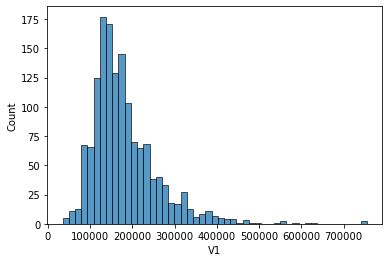

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["V1"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

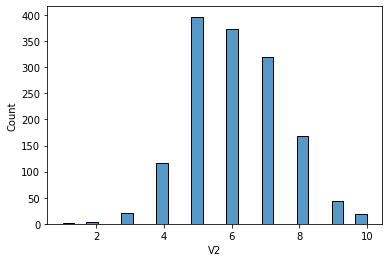

In [83]:
sns.histplot(data["V2"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

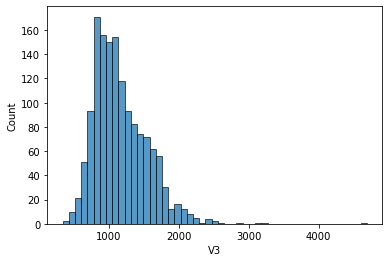

In [84]:
sns.histplot(data["V3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

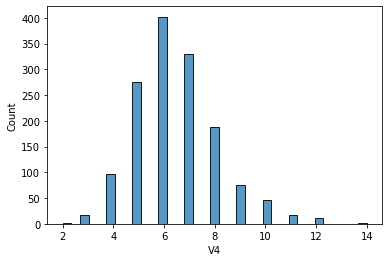

In [85]:
sns.histplot(data["V4"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

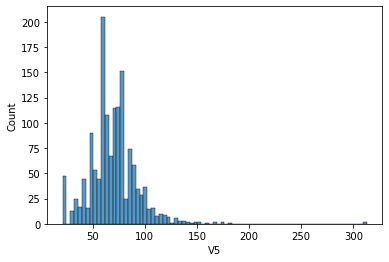

In [86]:
sns.histplot(data["V5"])
plt.show

#### Paso No.5

Variable Independiente x

In [87]:
df2.corr(method="pearson")

,V1,V2,V3,V4,V5
V1,1.000000,0.790982,0.605852,0.533723,0.298490
V2,0.790982,1.000000,0.476224,0.427452,0.215195
V3,0.605852,0.476224,1.000000,0.409516,0.373312
V4,0.533723,0.427452,0.409516,1.000000,0.294840
V5,0.298490,0.215195,0.373312,0.294840,1.000000


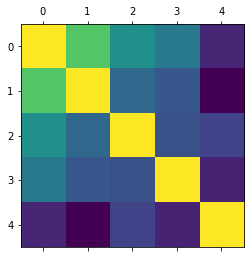

In [88]:
plt.matshow(df2.corr())